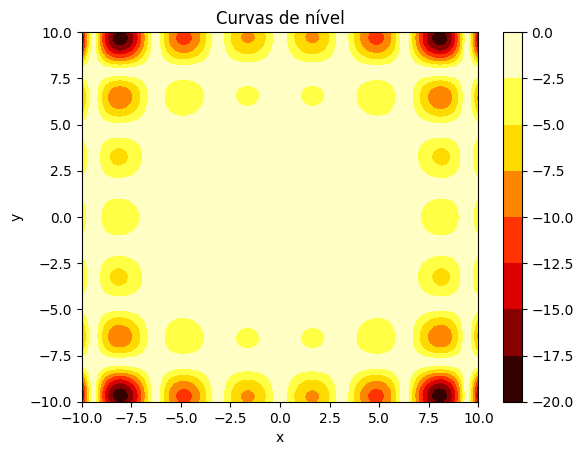

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from py_expression_eval import Parser
from ES import ESAlgorithm
from functions_suganthan import zakharov_func

parser = Parser()

@np.vectorize
def f(x,y):
    return parser.parse("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

{'dim': [-8.05918849763704, 9.646028146269927], 'sigma': [0.11638952417249775, 0.22489758280950092], 'eval': -19.204888065881658}
{'dim': [-8.026150944554304, 9.661317690358917], 'sigma': [0.2932564468036184, 0.3923174387741512], 'eval': -19.200186185322853}
{'dim': [-8.03888927108732, 9.693237889694387], 'sigma': [0.21951273880834762, 0.31191403121261785], 'eval': -19.197742699561562}
{'dim': [8.07026143869336, -9.632264808454934], 'sigma': [0.3305660058648348, 0.19296577691330308], 'eval': -19.195852745717886}
{'dim': [-8.013736500436814, 9.656755191222896], 'sigma': [0.1609657935560276, 0.672174884038616], 'eval': -19.191098885763918}
{'dim': [-8.072639393536377, -9.626393014799717], 'sigma': [0.26730289451799866, 0.60197139177743], 'eval': -19.190987669043338}
{'dim': [8.032267855103163, -9.703390964804639], 'sigma': [2.492349953872259, 0.1425927047934644], 'eval': -19.188358196815873}
{'dim': [8.101144046432054, -9.67059207967559], 'sigma': [0.503998220432493, 0.16464891224893244]

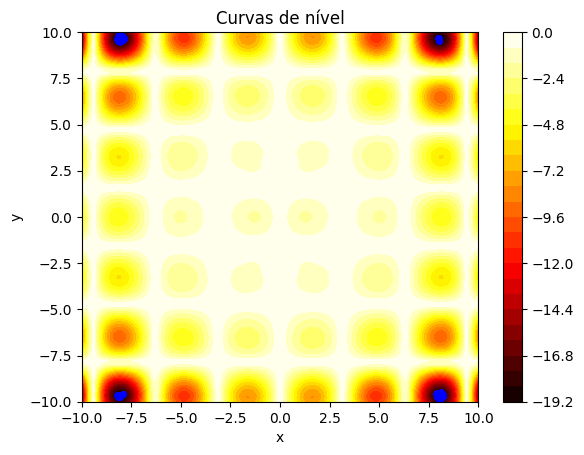

In [2]:

alg = ESAlgorithm()
alg.set_evaluation_expression("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))")
alg.set_num_dimensions(2)
alg.set_variable_bounds_test(0, 10, True, -10, True)
alg.set_variable_bounds_test(1, 10, True, -10, True)
alg.set_dimension_mapping(['x', 'y'])

res = alg.populational_non_isotropic_ES_test( dimension_gen_interval=(-10, 10), sigma_var=0.5, iter=10, seed=0, num_parents=100, num_offspring=200)

x_array = [i['dim'][0] for i in res]
y_array = [i['dim'][1] for i in res]
print('\n'.join([str(d) for d in res]))


@np.vectorize
def f(x,y):
    return parser.parse("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 25, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

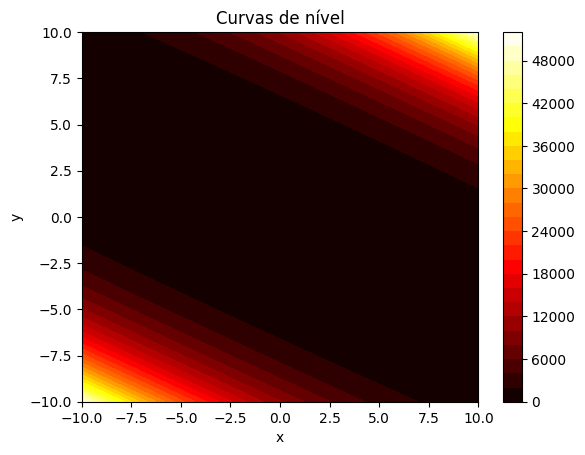

In [3]:

@np.vectorize
def f(x,y):
    return zakharov_func([x, y], 2,  [], [], 0, 0)

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 25, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

{'dim': [9.762700785464943, 43.0378732744839, 20.552675214328772, 8.976636599379376, -15.269040132219061, 29.17882261333122, -12.482557747461499, 78.35460015641596, 92.73255210020585, -23.31169623484446], 'eval': 5277017.0539830215}
{'dim': [7.209710969630865, 43.69149186992426, 21.417111413188277, 8.234471578972933, -12.999285508231454, 27.724456938732455, -12.436799230160053, 78.16741630639012, 94.2653313145643, -21.842337464944176], 'eval': 5008118.446600683}
{'dim': [6.161158004563772, 42.27147393274529, 19.710841222563264, 10.185246974204723, -13.508937689983107, 27.286382637121267, -13.68959459020998, 78.94490666222204, 92.65143346700636, -22.055077745158144], 'eval': 4234343.696779521}
{'dim': [5.2656914433700965, 42.65837643060455, 19.20003608499439, 9.00461479008231, -13.537119918321762, 27.714714507651685, -13.623077367826813, 79.24737855996182, 92.01711137332539, -22.417818911145282], 'eval': 4211709.13250464}
{'dim': [4.593230995594146, 42.29882326906401, 18.386889802949938

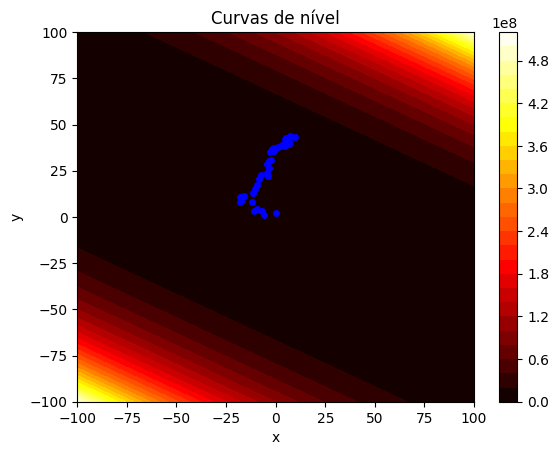

In [5]:
def zakharov_wrapper(x:list):
    return zakharov_func(x, 2,  [], [], 0, 0)

alg = ESAlgorithm()
#alg.set_evaluation_expression("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))")
alg.set_evaluation_function(zakharov_wrapper)
alg.set_num_dimensions(10)
alg.set_global_variable_bounds(100, True, -100, True)
#alg.set_variable_bounds_test(0, 100, True, -100, True)
#alg.set_variable_bounds_test(1, 100, True, -100, True)
#alg.set_dimension_mapping(['x', 'y'])

res = alg.one_plus_one_ES_test()#dimension_gen_interval=(-100, 100), sigma_var=0.5, iter=100, seed=0, num_parents=400, num_offspring=800)

x_array = [i['dim'][0] for i in res]
y_array = [i['dim'][1] for i in res]
print('\n'.join([str(d) for d in res]))

@np.vectorize
def f(x,y):
    return zakharov_wrapper([x, y])

n = 100
x = np.linspace(-100, 100, n)
y = np.linspace(-100, 100, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 25, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()